# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Import libraries, dependencies

In [13]:
# Dependencies
import json
import requests
import os
import pandas as pd
from datetime import datetime
from datetime import date
from scipy import stats
import matplotlib.pyplot as plt
from citipy import citipy
from pprint import pprint
from random import uniform # Draw samples from a uniform distribution
from api_keys import wt_key
import datetime
import scipy.stats as st
import sys

### Define functions

In [2]:

# Save figure into file, then display
def save_show_plot(filepath):
    filepath = f"{filepath}.png"
    
    file_exists = False        
    if os.path.isfile(filepath):
         file_exists = True 

    plt.savefig(filepath)
    if file_exists:
        print(f"*** Figure replaced in: {filepath} ************************")
    else:
        print(f"*** Figure created in: {filepath} ************************")

    # Show plot
    plt.show()    
    plt.close()

# Print regression information lines
def print_regression_info(slope, intercept, rvalue, pvalue, stderr):
    print(f"The r-squared is: {rvalue**2}")
    print(f"Intercept: {intercept}, rvalue: {rvalue}, pvalue: {pvalue}, stderr: {stderr}")
    if slope < 0:
        print(f"Slope: {slope}, it's a negative relationship")
    else:
        print(f"Slope: {slope}, it's a positive relationship")

### In this homework, metric system has been used.

### Setup file path and redirect stdout to file

In [3]:
# Holding the original output object. i.e. console out
path = "c:/PY_API_output"
# Export weather data to a csv file
try:
    os.mkdir(path)
    print(f"*** Folder created: {path} ***")
except OSError as error:
    print(f"*** Folder already existed: {path} ***")    

# Holding the original output object. i.e. console out    
orig_stdout = sys.stdout

# Opening the file to write file deletion logs.
log_filename = 'WeatherPYLog.txt'
filepath = f"{path}/{log_filename}"  
log_file = open(filepath, 'a+')

print(f"*** Creating log file: {filepath} ...")

# Changing standard out to file out. 
sys.stdout = log_file

*** Folder already existed: c:/PY_API_output ***
*** Creating log file: c:/PY_API_output/WeatherPYLog.txt ...


### Generate Cities List

In [4]:
print(f"Generate City List ==========================")
# Generate a 500 cities list using citipy
unique_cities = list()
duplicate_cities = list()

while len(unique_cities) < 500:
    # generate a 500 unique latitude and longitude values starting from Melbourne, Australia
    long = round(uniform(144.946,-140), 3) #longitude ranges 
    lat = round(uniform(-37.841, 30), 3) #latitude ranges 

    #feed into citipy the lat, long coordinates to return as city object
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code    

    # add the city and it's country code to the cities set
    city_entry = f"{city_name},{country_code}"
    if city_entry not in unique_cities:
        unique_cities.append(city_entry)
    else:
        duplicate_cities.append(city_entry)

print(f"Unique city: {len(unique_cities)}")
print(f"Duplicated city: {len(duplicate_cities)}")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print(f"Perform Weather API search ===========================")

no_weather_cities = list()
city_entry = ''
city_names = list()
city_countries = list()
city_ids = list()
temperatures = list()
latitudes = list()
longitudes = list()
humidities = list()
clouds = list()
wind_speeds = list()
conv_receive_dates = list()
url = 'http://api.openweathermap.org/data/2.5/weather?'

for city_entry in unique_cities:

    request_url = url + "appid=" + wt_key + "&q=" + city_entry + "?" + "&units=metric"
    response = requests.get(request_url)
    weather_json = response.json()

    if weather_json['cod'] == 200:
        city_ids.append(weather_json['id'])
        city_names.append(weather_json['name'])   
        # convert datetime to readable format 
        conv_receive_dates.append(datetime.datetime.fromtimestamp(weather_json['dt']).strftime('%d-%m-%Y %H:%M:%S'))   
        city_countries.append(weather_json['sys']['country'])
        latitudes.append(weather_json['coord']['lat'])        
        longitudes.append(weather_json['coord']['lon'])
        temperatures.append(weather_json['main']['temp'])
        humidities.append(weather_json['main']['humidity'])
        wind_speeds.append(weather_json['wind']['speed'])        
        clouds.append(weather_json['clouds']['all'])
        print(f"City id: {weather_json['id']}, Name and Country: {city_entry}.")

    else:        
        no_weather_cities.append(city_entry)        
        print(f"City Name and Country: {city_entry}. *** City not found.***")

print(f"Weather city: {len(city_ids)}")
print(f"No weather city: {len(no_weather_cities)}")

### Close log file and redirect to stdout to console

In [6]:
# replacing the original output format to stdout.
print(f"*** Log file created: {filepath} ************************************")
sys.stdout = orig_stdout

# Closing the log file.
log_file.close()

In [7]:
sys.stdout.flush() 
print(f"*** Log file created: {filepath} *******")

*** Log file created: c:/PY_API_output/WeatherPYLog.txt *******


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame from the read data
weather_dict = {
    "city id": city_ids,
    "city": city_names,
    "country": city_countries,
    "latitude": latitudes,
    "longitute": longitudes,
    "temperature(C)": temperatures,
    "humidity(%)": humidities,
    "wind speed(mps)": wind_speeds,
    "cloud(%)": clouds,
    "receive date": conv_receive_dates
}
weather_data = pd.DataFrame(weather_dict)

print(f"weather_data: {len(weather_data)} rows.")
weather_data.head()

weather_data: 464 rows.


,city id,city,country,latitude,longitute,temperature(C),humidity(%),wind speed(mps),cloud(%),receive date
0,4020109,Atuona,PF,-9.8000,-139.0333,25.30,82,11.21,46,20-06-2022 22:58:22
1,4030556,Rikitea,PF,-23.1203,-134.9692,20.97,59,7.38,0,20-06-2022 22:57:14
2,1267390,Kavaratti,IN,10.5669,72.6420,28.06,78,8.20,100,20-06-2022 22:58:48
3,3652764,Puerto Ayora,EC,-0.7393,-90.3518,19.75,100,3.13,82,20-06-2022 22:57:23
4,5855927,Hilo,US,19.7297,-155.0900,21.00,91,3.60,100,20-06-2022 23:04:22


In [9]:
file_name = 'weather_data.csv'
filepath = f"{path}/{file_name}"  
weather_data.to_csv(filepath)
print(f"*** File created in: {filepath} ********************************************" )

*** File created in: c:/PY_API_output/weather_data.csv ********************************************


### Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Get the cities that have humidity not over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_weather_data".

clean_weather_data = weather_data.drop(weather_data[(weather_data["humidity(%)"] > 100)].index, inplace=False)
print(f"clean weather data: {len(clean_weather_data)} rows")
clean_weather_data.head()


clean weather data: 464 rows


,city id,city,country,latitude,longitute,temperature(C),humidity(%),wind speed(mps),cloud(%),receive date
0,4020109,Atuona,PF,-9.8000,-139.0333,25.30,82,11.21,46,20-06-2022 22:58:22
1,4030556,Rikitea,PF,-23.1203,-134.9692,20.97,59,7.38,0,20-06-2022 22:57:14
2,1267390,Kavaratti,IN,10.5669,72.6420,28.06,78,8.20,100,20-06-2022 22:58:48
3,3652764,Puerto Ayora,EC,-0.7393,-90.3518,19.75,100,3.13,82,20-06-2022 22:57:23
4,5855927,Hilo,US,19.7297,-155.0900,21.00,91,3.60,100,20-06-2022 23:04:22


### Open log file and redirect output to file

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# Get today's date to use in plot title
today_date = date.today()
today_date = today_date.strftime("%d-%m-%Y")
print("today: ", today_date)

today:  20-06-2022


## Latitude vs. Temperature Plot

*** Figure replaced in: c:/PY_API_output/LatitudeVsTemperature.png ************************


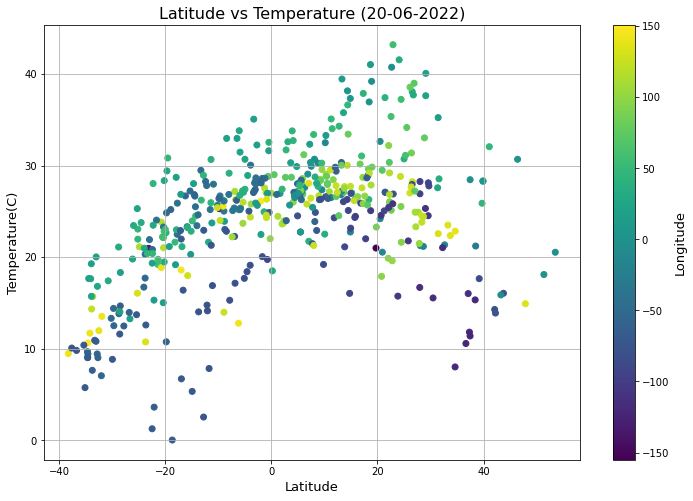

The correlation between mouse weight and average tumor volume factors is 0.46


In [14]:
# Generate a scatter plot of Latitude vs Temperature(C)

latitudes = clean_weather_data["latitude"]
longitutes = clean_weather_data["longitute"]
temperatures = clean_weather_data["temperature(C)"]
label_fontsize = 13
title_fontsize = 16

plt.rcParams["figure.figsize"] = (12,8)

title = f"Latitude vs Temperature ({today_date})"
plt.scatter(latitudes, temperatures, c=longitudes)
plt.ylabel('Temperature(C)', fontsize= label_fontsize)
plt.xlabel('Latitude', fontsize = label_fontsize)
plt.title(title, fontsize = title_fontsize)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "LatitudeVsTemperature"
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)

correlation = st.pearsonr(latitudes,temperatures)
print(f"The correlation between mouse weight and average tumor volume factors is {round(correlation[0],2)}")

## Latitude vs. Humidity Plot

*** Figure replaced in: c:/PY_API_output/LatitudeVsHumidity.png ************************


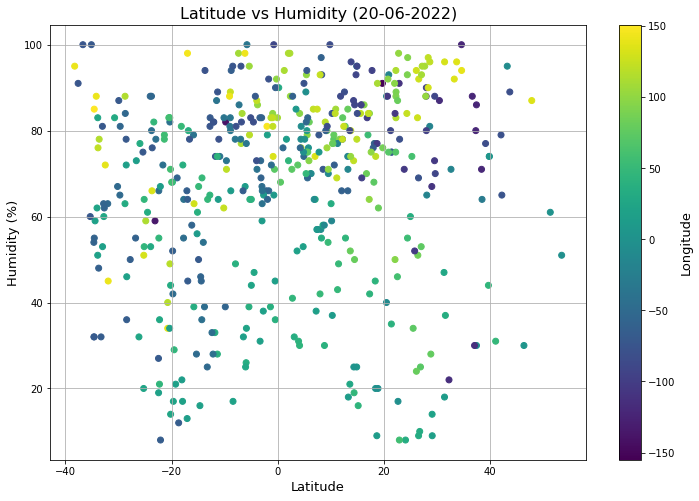

The correlation between mouse weight and average tumor volume factors is 0.11


In [16]:
# Generate a scatter plot of Latitude Vs. Humidity (%)

humitities = clean_weather_data["humidity(%)"]
plt.ylabel('Humidity (%)', fontsize = label_fontsize)
plt.xlabel('Latitude', fontsize = label_fontsize)
title = f"Latitude vs Humidity ({today_date})"
plt.title(title, fontsize = title_fontsize)
plt.scatter(latitudes, humidities, c=longitudes)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "LatitudeVsHumidity"
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)

correlation = st.pearsonr(latitudes,humitities)
print(f"The correlation between mouse weight and average tumor volume factors is {round(correlation[0],2)}")

## Latitude vs. Cloudiness Plot

*** Figure created in: c:/PY_API_output/LatitudeVsCloudiness.png ************************


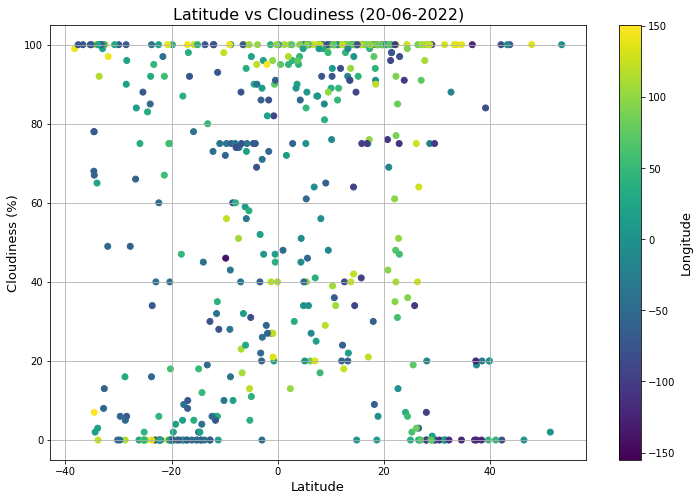

The correlation between mouse weight and average tumor volume factors is 0.11


In [17]:
# Generate a scatter plot of Latitude vs Cloudiness (%)

clouds = clean_weather_data["cloud(%)"]
plt.ylabel('Cloudiness (%)', fontsize = label_fontsize)
plt.xlabel('Latitude', fontsize = label_fontsize)
title = f"Latitude vs Cloudiness ({today_date})"
plt.title(title, fontsize = title_fontsize)
plt.scatter(latitudes, clouds, c=longitudes)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
# plt.savefig("LatitudeVsCloudiness.png")

file_name = "LatitudeVsCloudiness"
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)

correlation = st.pearsonr(latitudes,clouds)
print(f"The correlation between mouse weight and average tumor volume factors is {round(correlation[0],2)}")

## Latitude vs. Wind Speed Plot

*** Figure created in: c:/PY_API_output/LatitudeVsWindSpeed.png ************************


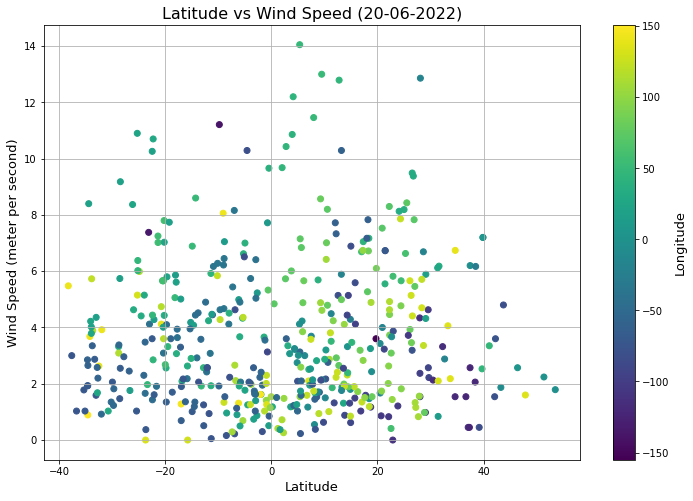

The correlation between mouse weight and average tumor volume factors is 0.03


In [18]:
# Generate a scatter plot of Latitude vs Wind Speed

wind_speeds = clean_weather_data["wind speed(mps)"]
plt.ylabel('Wind Speed (meter per second)', fontsize = label_fontsize)
plt.xlabel('Latitude', fontsize = label_fontsize)
title = f"Latitude vs Wind Speed ({today_date})"
plt.title(title, fontsize = title_fontsize)
plt.scatter(latitudes, wind_speeds, c=longitudes)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "LatitudeVsWindSpeed"
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)

correlation = st.pearsonr(latitudes,wind_speeds)
print(f"The correlation between mouse weight and average tumor volume factors is {round(correlation[0],2)}")

## Linear Regression

In [19]:
# Separate weather data to two groups: Northern Hemisphere and Southern Hemisphere

nth_weather_data = clean_weather_data.loc[(weather_data["latitude"] >= 0), ["latitude", "longitute", "temperature(C)", "humidity(%)", "cloud(%)", "wind speed(mps)"]]
print(f"northern weather: {len(nth_weather_data)} rows.")
nth_weather_data.head()

northern weather: 245 rows.


,latitude,longitute,temperature(C),humidity(%),cloud(%),wind speed(mps)
2,10.5669,72.6420,28.06,78,100,8.20
4,19.7297,-155.0900,21.00,91,100,3.60
5,13.6017,26.6876,35.78,21,91,1.31
6,28.6585,-17.9182,21.18,81,75,6.69
7,4.1213,43.8894,32.73,30,97,12.20


In [22]:
sth_weather_data = clean_weather_data.loc[(weather_data["latitude"] < 0), ["latitude", "longitute", "temperature(C)", "humidity(%)", "cloud(%)", "wind speed(mps)"]]
print(f"southern weather: {len(sth_weather_data)} rows")
sth_weather_data.head()

southern weather: 219 rows


,latitude,longitute,temperature(C),humidity(%),cloud(%),wind speed(mps)
0,-9.8000,-139.0333,25.30,82,46,11.21
1,-23.1203,-134.9692,20.97,59,0,7.38
3,-0.7393,-90.3518,19.75,100,82,3.13
8,-3.8004,102.2655,25.81,86,100,1.98
11,-12.0432,-77.0282,14.14,82,100,2.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

*** Figure created in: c:/PY_API_output/NthTemperatureVSLatitude.png ************************


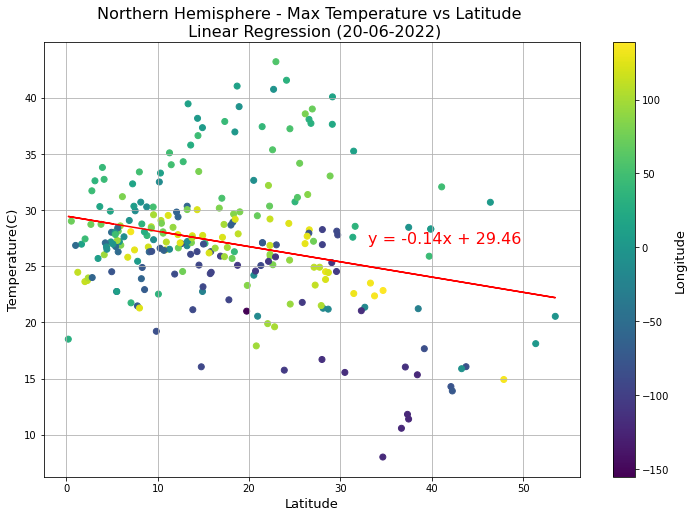

The r-squared is: 0.07094886661623627
Intercept: 29.456989042404796, rvalue: -0.2663622845228586, pvalue: 2.3949675033573944e-05, stderr: 0.03146761511437594
Slope: -0.13555635694683718, it's a negative relationship


In [20]:
# Generate a linear regression model for Northern Max Temperature vs Latitude

x_values = nth_weather_data['latitude']
y_values = nth_weather_data['temperature(C)']
longitudes = nth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33,27),fontsize=title_fontsize, color="red")
plt.xlabel('Latitude', fontsize = label_fontsize)
plt.ylabel('Temperature(C)', fontsize = label_fontsize)

title = f"Northern Hemisphere - Max Temperature vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = title_fontsize)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "NthTemperatureVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)                    

print_regression_info(slope, intercept, rvalue, pvalue, stderr)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

*** Figure created in: c:/PY_API_output/SthTemperatureVSLatitude.png ************************


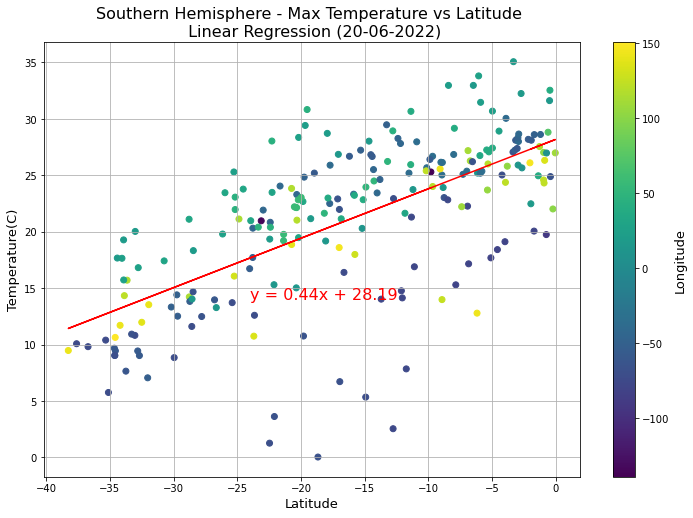

The r-squared is: 0.4426445433117519
Intercept: 28.186323768027293, rvalue: 0.6653153713178074, pvalue: 2.3071178697308244e-29, stderr: 0.03335343736995782
Slope: 0.4378565936962882, it's a positive relationship


In [23]:
# Generate a linear regression model for Southern Max Temperature vs Latitude

x_values = sth_weather_data['latitude']
y_values = sth_weather_data['temperature(C)']
longitudes = sth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-24,14), fontsize= title_fontsize, color="red")
plt.xlabel('Latitude', fontsize = label_fontsize)
plt.ylabel('Temperature(C)', fontsize = label_fontsize)

title = f"Southern Hemisphere - Max Temperature vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = title_fontsize)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "SthTemperatureVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)         

print_regression_info(slope, intercept, rvalue, pvalue, stderr)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

*** Figure created in: c:/PY_API_output/NthHumidityVSLatitude.png ************************


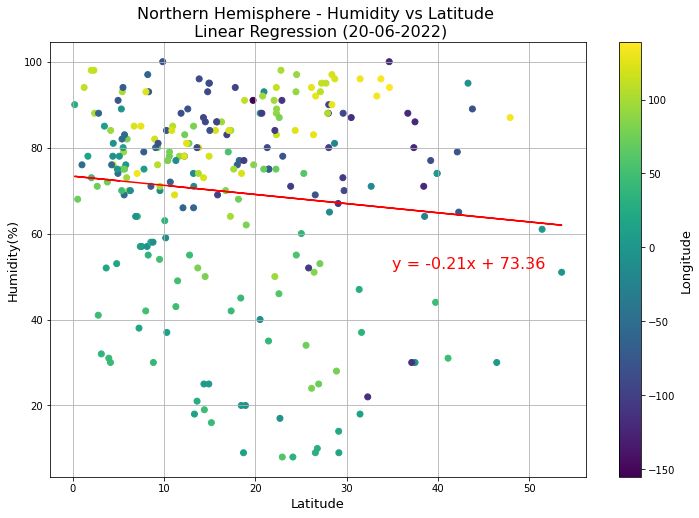

The r-squared is: 0.010789741011137145
Intercept: 73.35628251446883, rvalue: -0.10387367814387409, pvalue: 0.10481280031703706, stderr: 0.13078920515493253
Slope: -0.21292969967346453, it's a negative relationship


In [24]:
# Generate a linear regression model for Northern Humitity vs Latitude

x_values = nth_weather_data['latitude']
y_values = nth_weather_data['humidity(%)']
longitudes = nth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,52), fontsize=title_fontsize, color="red")
plt.xlabel('Latitude', fontsize = label_fontsize)
plt.ylabel('Humidity(%)', fontsize = label_fontsize)

title = f"Northern Hemisphere - Humidity vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = title_fontsize)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "NthHumidityVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)         

print_regression_info(slope, intercept, rvalue, pvalue, stderr)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

*** Figure created in: c:/PY_API_output/SthHumidityVSLatitude.png ************************


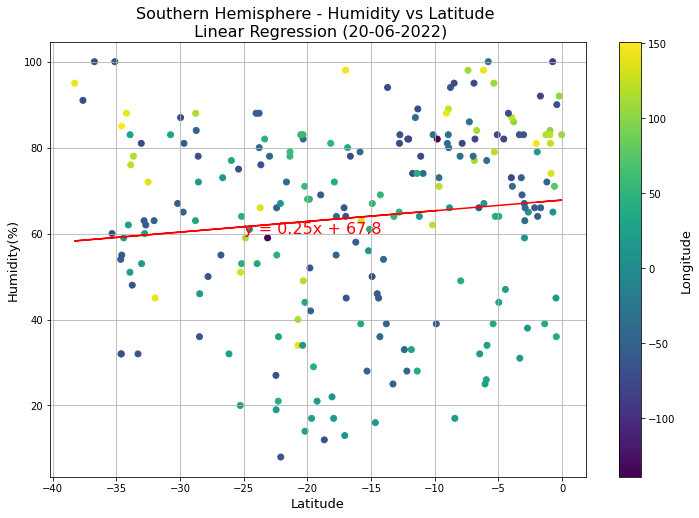

The r-squared is: 0.01421284659694935
Intercept: 67.79526966790343, rvalue: 0.11921764381562551, pvalue: 0.0783320019183154, stderr: 0.14046067123603317
Slope: 0.24844688937242823, it's a positive relationship


In [25]:
# Generate a linear regression model for Southern Humitity vs Latitude

x_values = sth_weather_data['latitude']
y_values = sth_weather_data['humidity(%)']
longitudes = sth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,60), fontsize=title_fontsize, color="red")
plt.xlabel('Latitude', fontsize = label_fontsize)
plt.ylabel('Humidity(%)', fontsize = label_fontsize)

title = f"Southern Hemisphere - Humidity vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = title_fontsize)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "SthHumidityVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)      

print_regression_info(slope, intercept, rvalue, pvalue, stderr)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

*** Figure created in: c:/PY_API_output/NthCloudVSLatitude.png ************************


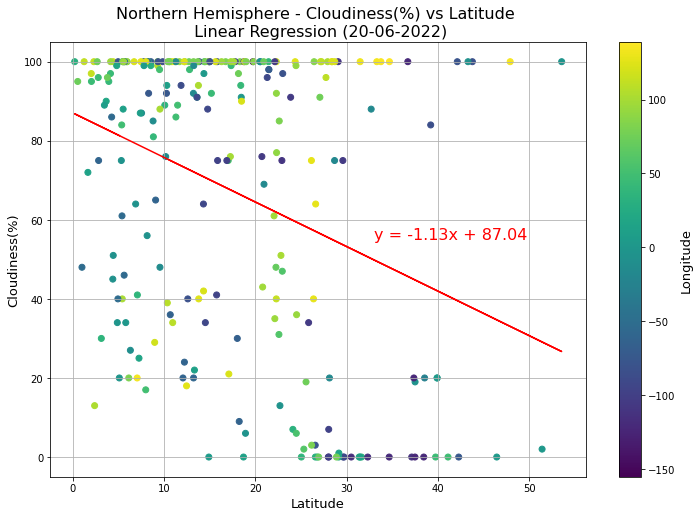

The r-squared is: 0.11118439110856063
Intercept: 87.04014037819339, rvalue: -0.33344323521187325, pvalue: 8.976599158555347e-08, stderr: 0.20450824811119486
Slope: -1.1275350208940154, it's a negative relationship


In [26]:
# Generate a linear regression model for Northern Cloudiness vs Latitude

x_values = nth_weather_data['latitude']
y_values = nth_weather_data['cloud(%)']
longitudes = nth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33,55), fontsize=title_fontsize, color="red")
plt.xlabel('Latitude', fontsize = label_fontsize)
plt.ylabel('Cloudiness(%)', fontsize = label_fontsize)

title = f"Northern Hemisphere - Cloudiness(%) vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = title_fontsize)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "NthCloudVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)      

print_regression_info(slope, intercept, rvalue, pvalue, stderr)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

*** Figure replaced in: c:/PY_API_output/SthCloudVSLatitude.png ************************


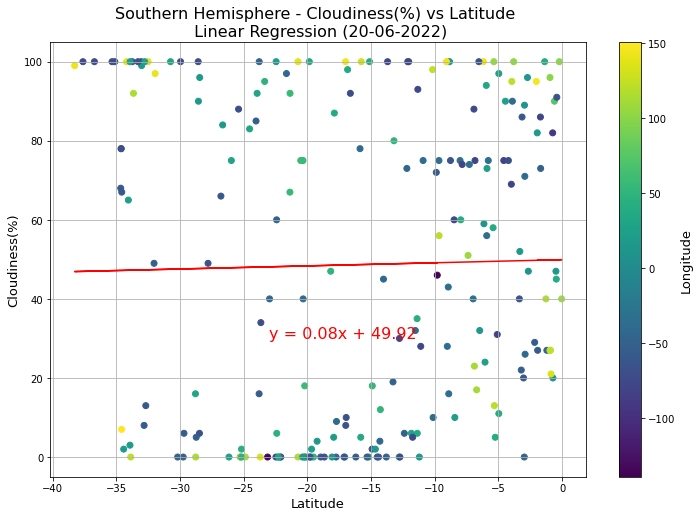

The r-squared is: 0.00044654623188564196
Intercept: 49.92045168542439, rvalue: 0.021131640539381744, pvalue: 0.7558273686744402, stderr: 0.2524640957451214
Slope: 0.07860672324241498, it's a positive relationship


In [28]:
# Generate a linear regression model for Southern Cloudiness vs Latitude

x_values = sth_weather_data['latitude']
y_values = sth_weather_data['cloud(%)']
longitudes = sth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=title_fontsize, color="red")
plt.xlabel('Latitude', fontsize = label_fontsize)
plt.ylabel('Cloudiness(%)', fontsize = label_fontsize)

title = f"Southern Hemisphere - Cloudiness(%) vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = title_fontsize)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = label_fontsize)
plt.grid(True)

# Save the figure
file_name = "SthCloudVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)      

print_regression_info(slope, intercept, rvalue, pvalue, stderr)


####  Norhthern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression

*** Figure created in: c:/PY_API_output/NthWindSpeedVSLatitude.png ************************


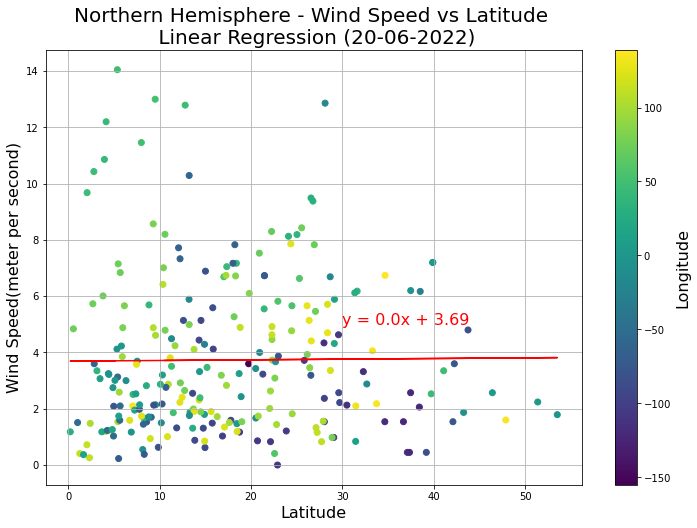

The r-squared is: 9.064067275616917e-05
Intercept: 3.6924708637469155, rvalue: 0.009520539520225163, pvalue: 0.8821365735903229, stderr: 0.015702742051960587
Slope: 0.0023305577920669633, it's a positive relationship


In [29]:
# Generate a linear regression model for Northern Wind Speed vs Latitude

x_values = nth_weather_data['latitude']
y_values = nth_weather_data['wind speed(mps)']
longitudes = nth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,5),fontsize=16,color="red")
plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Wind Speed(meter per second)', fontsize = 16)

title = f"Northern Hemisphere - Wind Speed vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = 20)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = 16)
plt.grid(True)

# Save the figure
file_name = "NthWindSpeedVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)      

print_regression_info(slope, intercept, rvalue, pvalue, stderr)


####  Southern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression

*** Figure created in: c:/PY_API_output/SthWindSpeedVSLatitude.png ************************


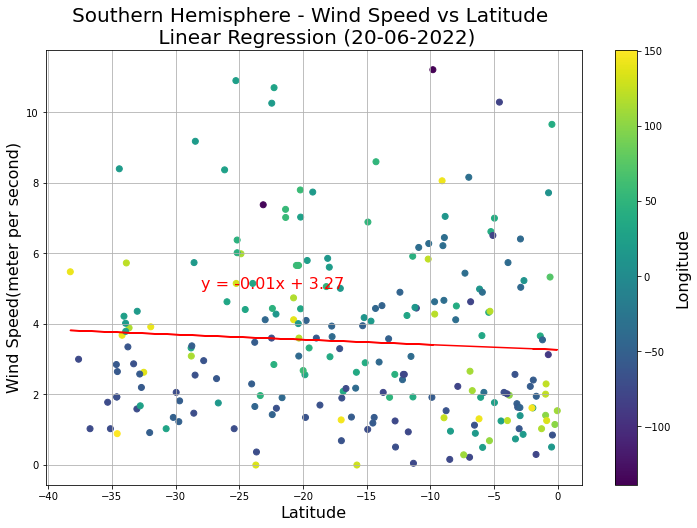

The r-squared is: 0.004117132190321309
Intercept: 3.2685765625515244, rvalue: -0.06416488284350957, pvalue: 0.3446110191674001, stderr: 0.015147875593982214
Slope: -0.014347455011761264, it's a negative relationship


In [30]:
# Generate a linear regression model for Southern Wind Speed vs Latitude

x_values = sth_weather_data['latitude']
y_values = sth_weather_data['wind speed(mps)']
longitudes = sth_weather_data['longitute']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=longitudes)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-28,5),fontsize=16,color="red")
plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Wind Speed(meter per second)', fontsize = 16)

title = f"Southern Hemisphere - Wind Speed vs Latitude \n Linear Regression ({today_date})"
plt.title(title, fontsize = 20)

clb = plt.colorbar()
clb.set_label('Longitude', fontsize = 16)
plt.grid(True)

# Save the figure
file_name = "SthWindSpeedVSLatitude"  
filepath = f"{path}/{file_name}"  
save_show_plot(filepath)     

print_regression_info(slope, intercept, rvalue, pvalue, stderr)
